<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

LEFT_PATH = 'data/bb_left_forearm_csv/'
RIGHT_PATH = 'data/bb_right_forearm_csv/'
PATH = 'data/bb_capture/'

In [2]:
files = next(os.walk(PATH))[2]
filenames = []
bb_dfs = []
left_bb_dfs = []
right_bb_dfs = []

for id_, filename in tqdm(enumerate(files), total=len(files)):
    filenames.append(filename)
    bb_df = pd.read_csv(PATH + filename)
    lb = float(bb_df.head(1)['timestamp'])
    rb = float(bb_df.tail(1)['timestamp'])
    
    bb_dfs.append(bb_df)    
    
    df = pd.read_csv(LEFT_PATH + 'leftarm_' + filename)
    df.drop('key', axis=1, inplace=True)
    df = df[(df['timestamp'] >= lb) & (df['timestamp'] <= rb)]
    left_bb_dfs.append(df)   
    
    df = pd.read_csv(RIGHT_PATH + 'rightarm_' + filename)
    df.drop('key', axis=1, inplace=True)
    df = df[(df['timestamp'] >= lb) & (df['timestamp'] <= rb)]
    right_bb_dfs.append(df)       

100%|██████████| 3/3 [00:10<00:00,  3.42s/it]


bb_capture_capture_2018_03_23_12_54_35.csv


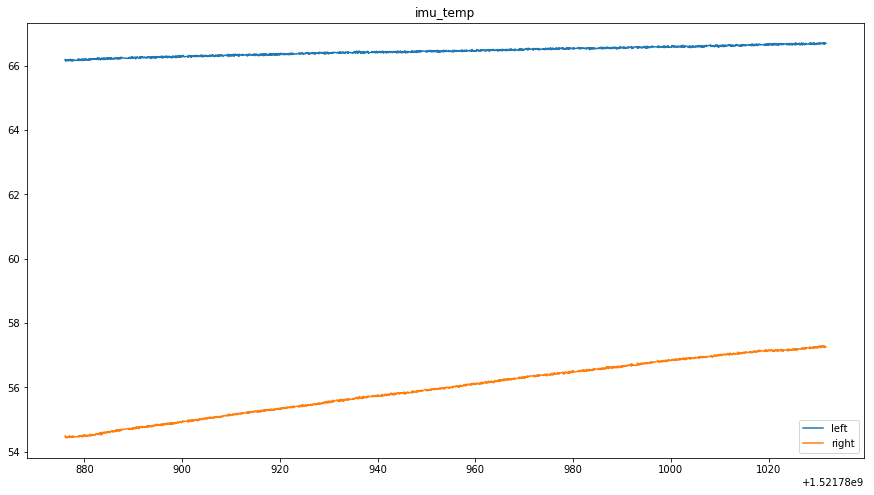

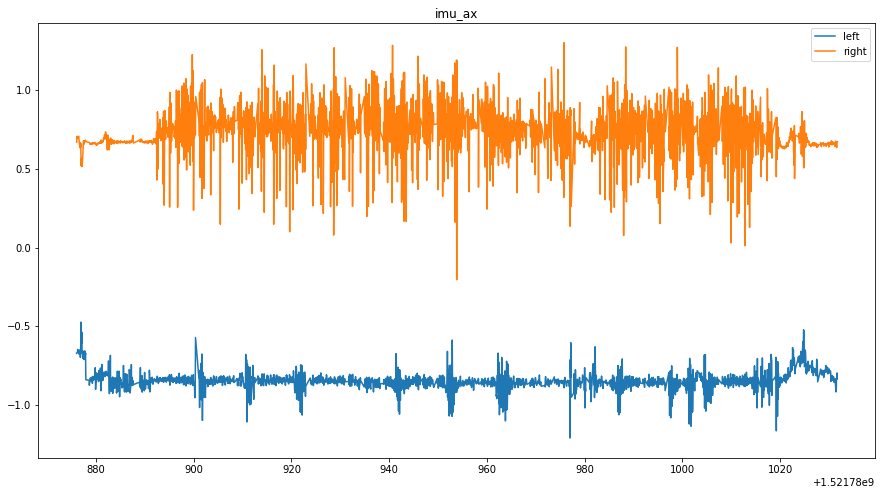

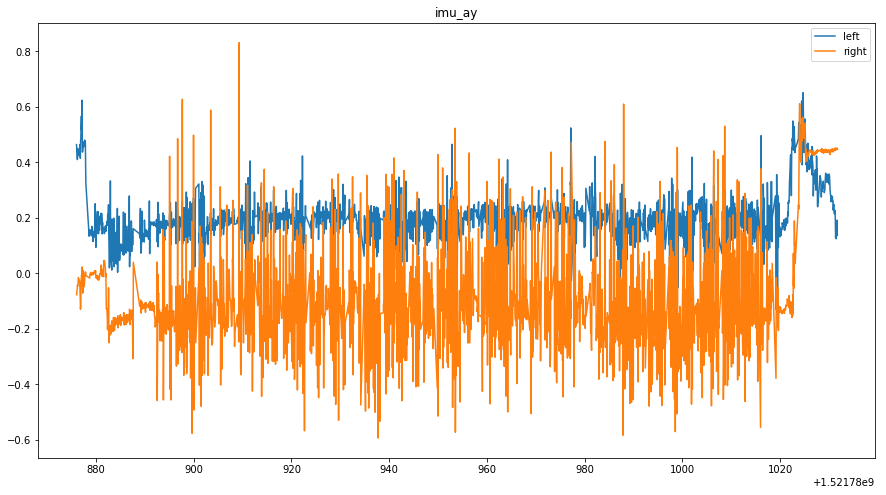

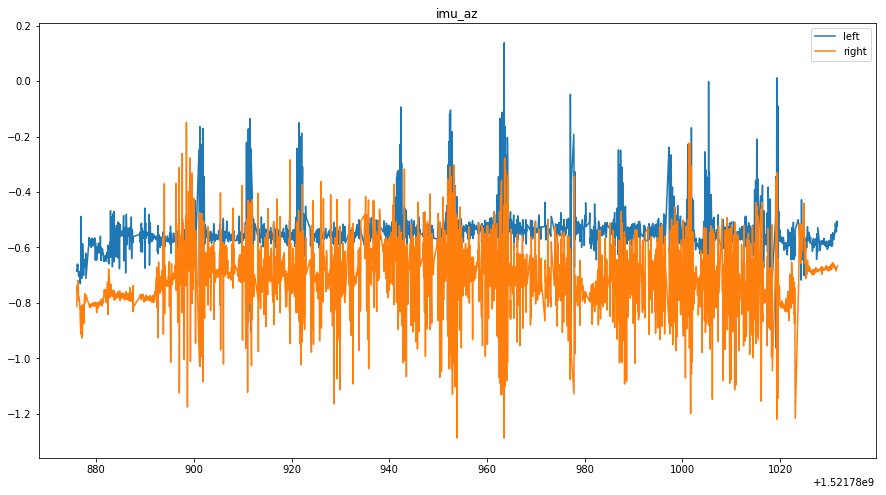

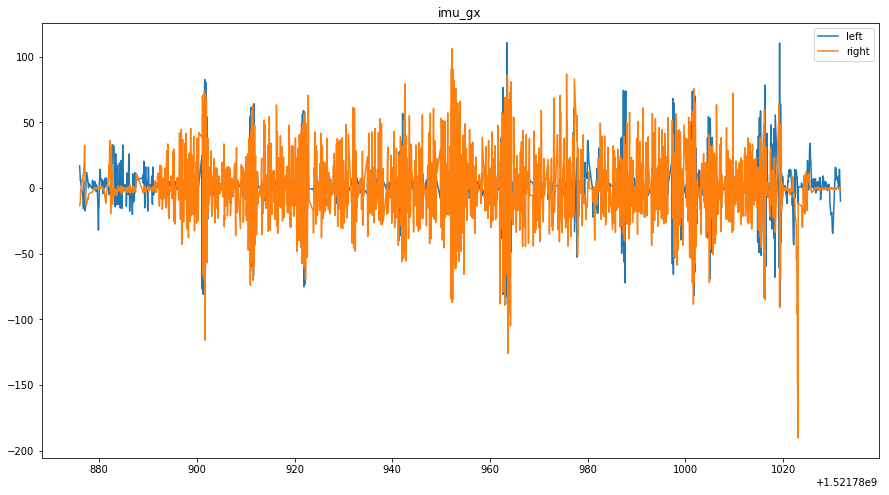

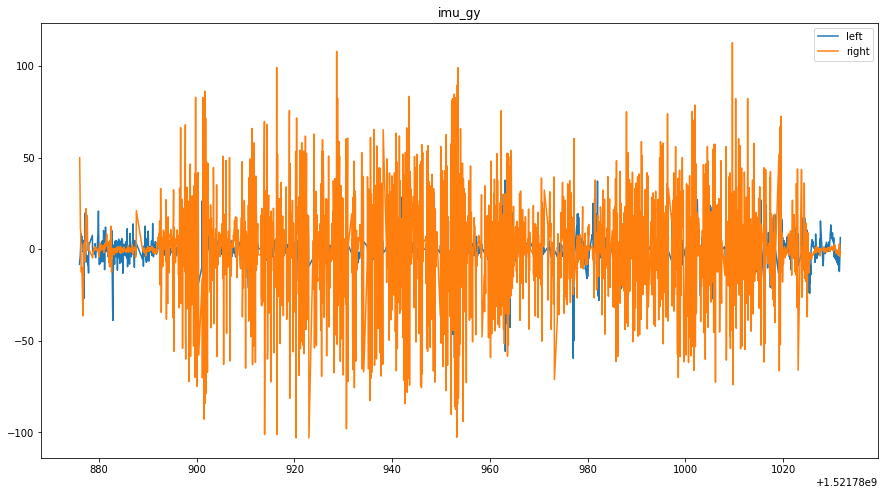

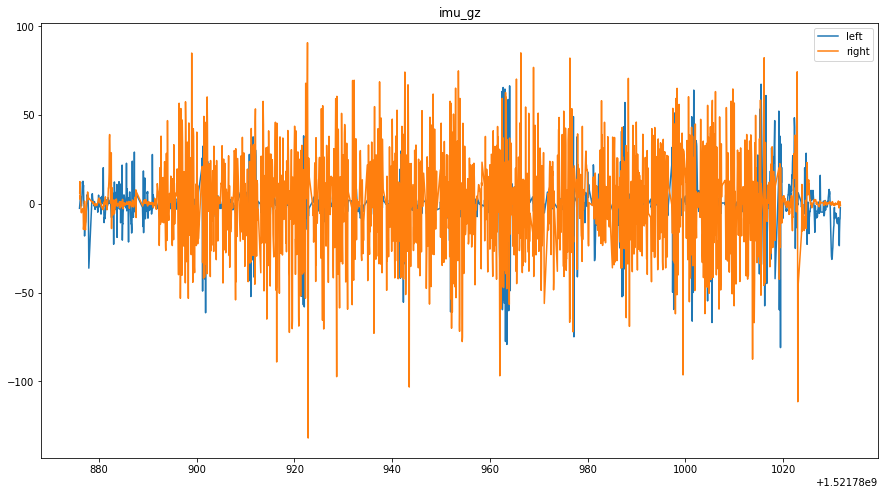

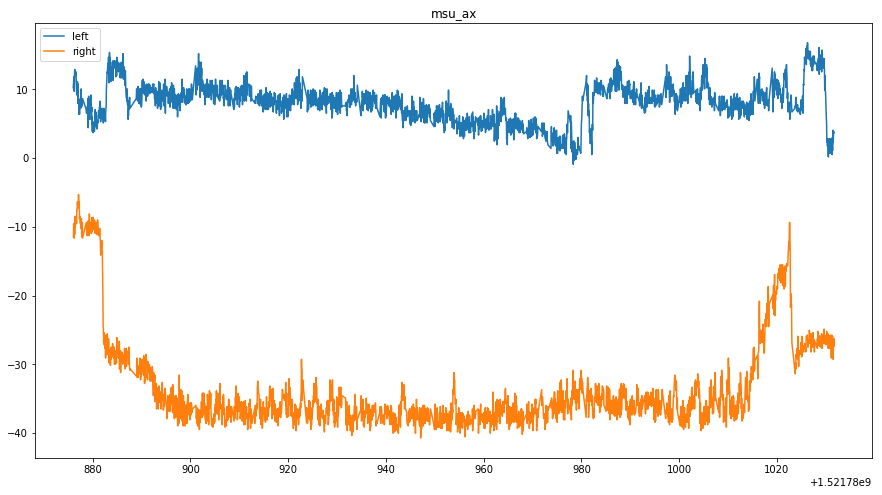

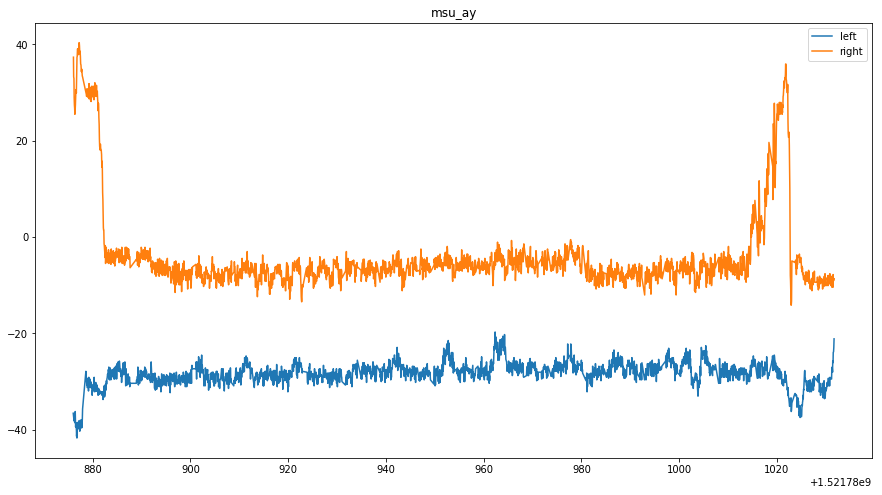

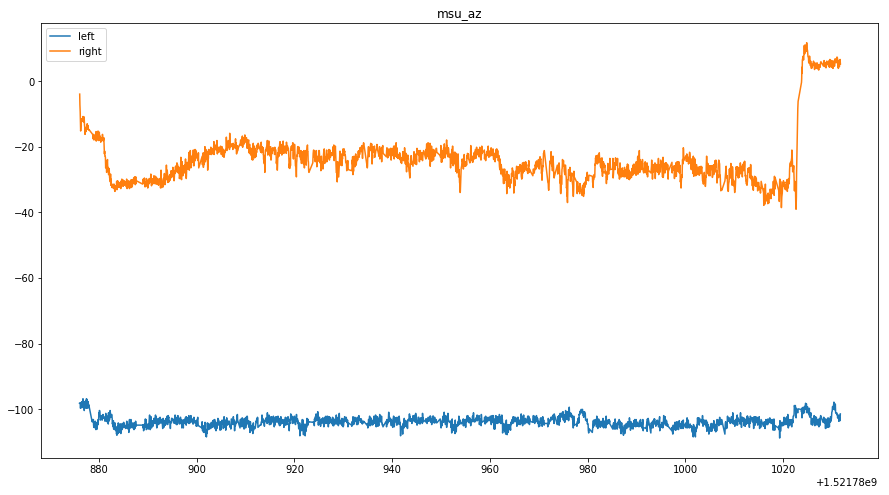

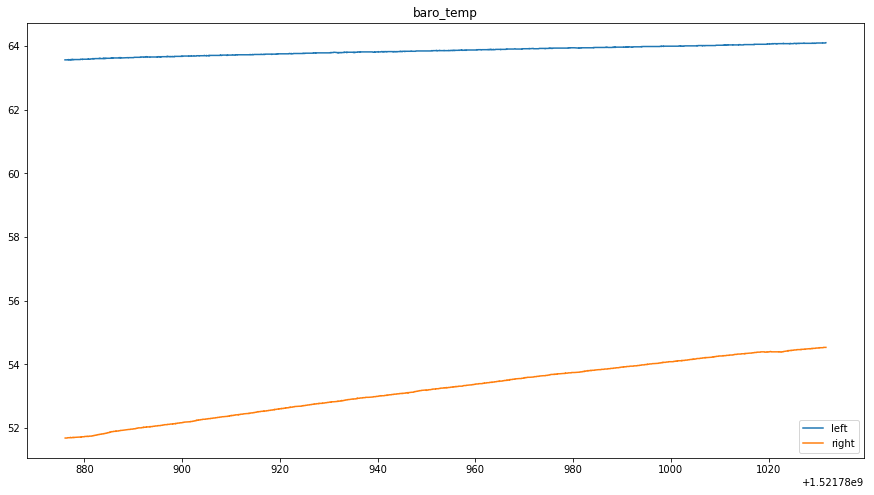

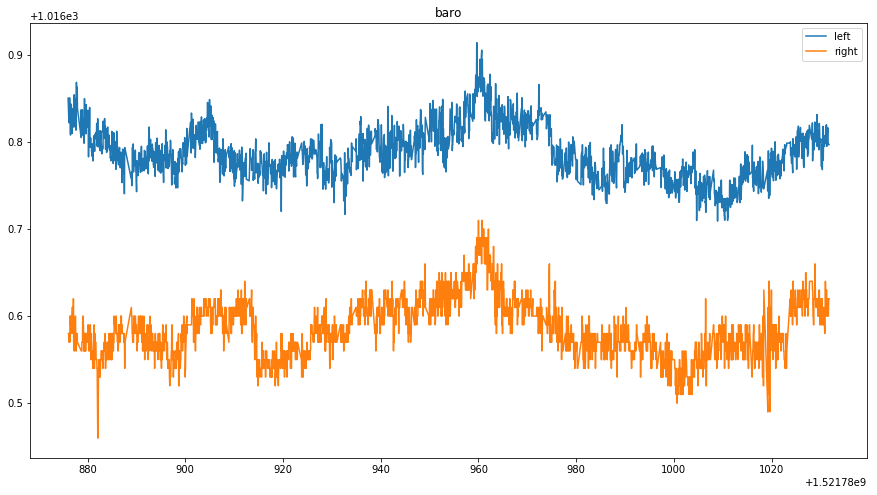

bb_capture_capture_2018_03_23_12_51_28.csv


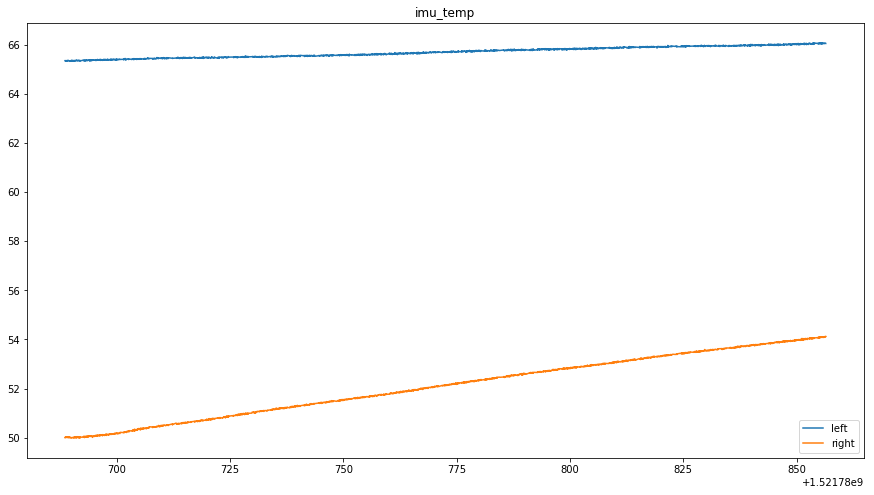

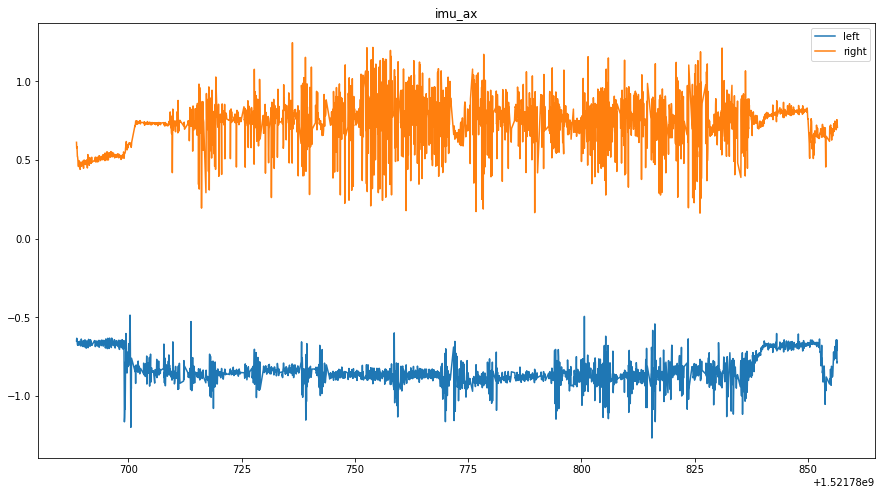

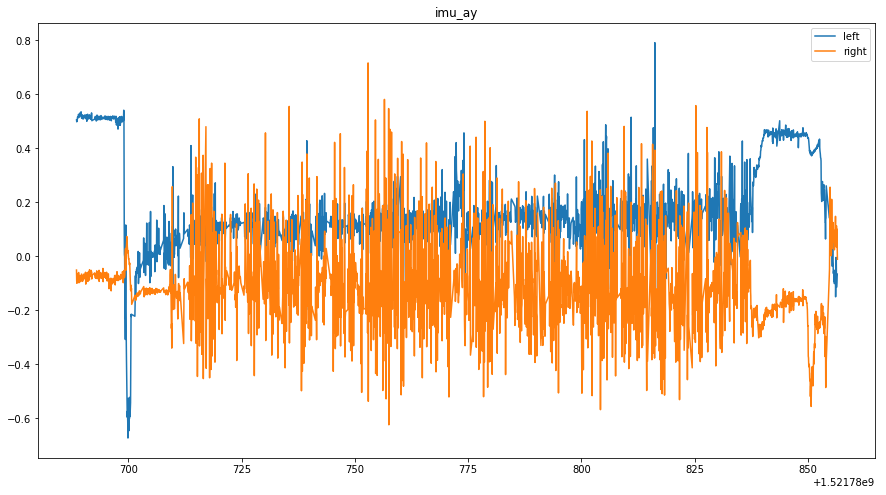

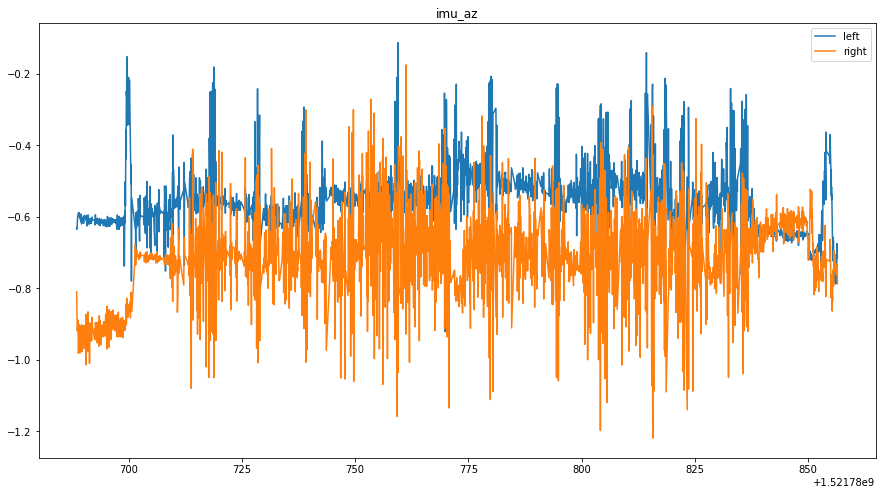

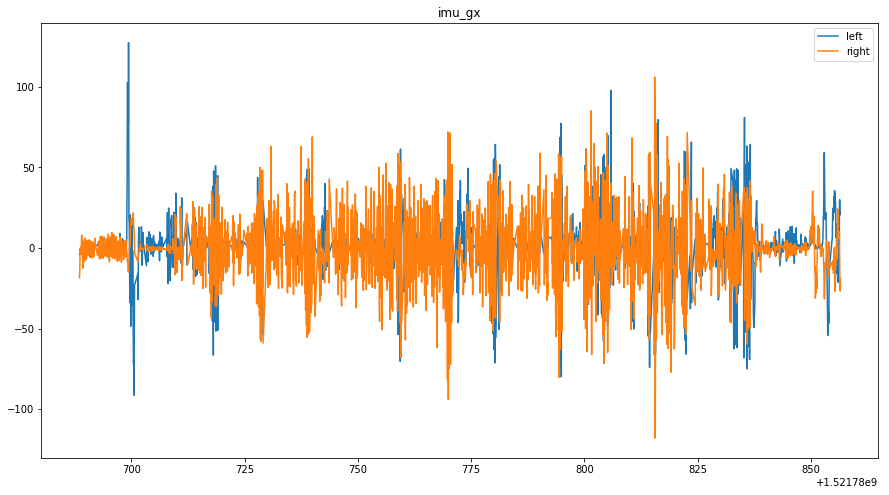

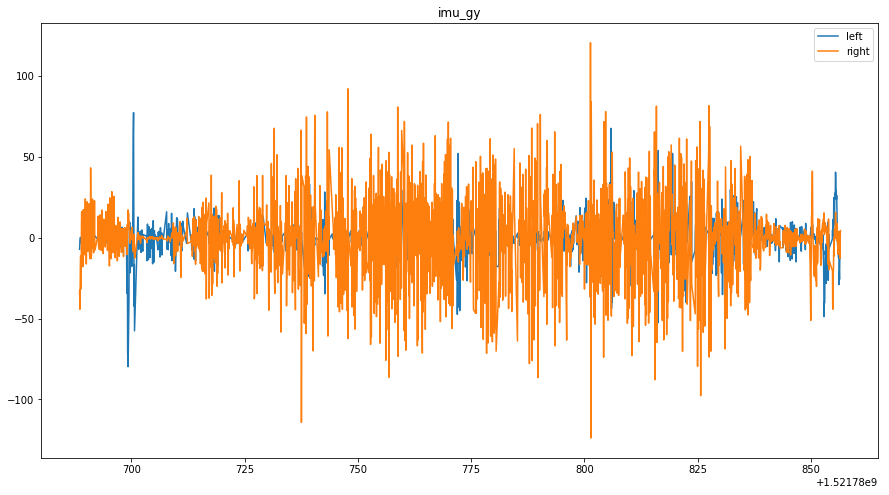

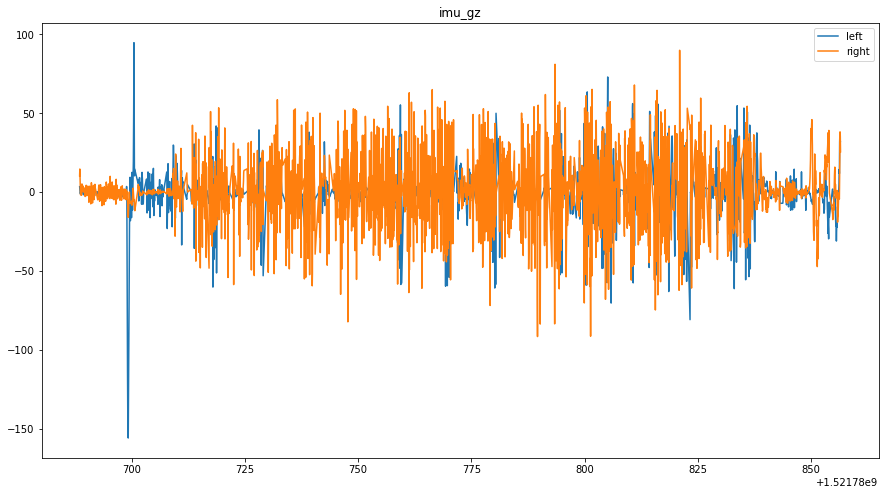

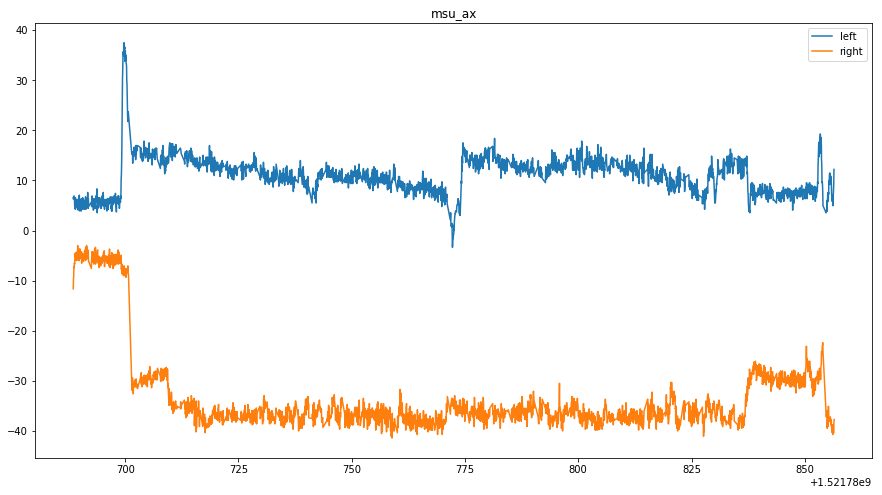

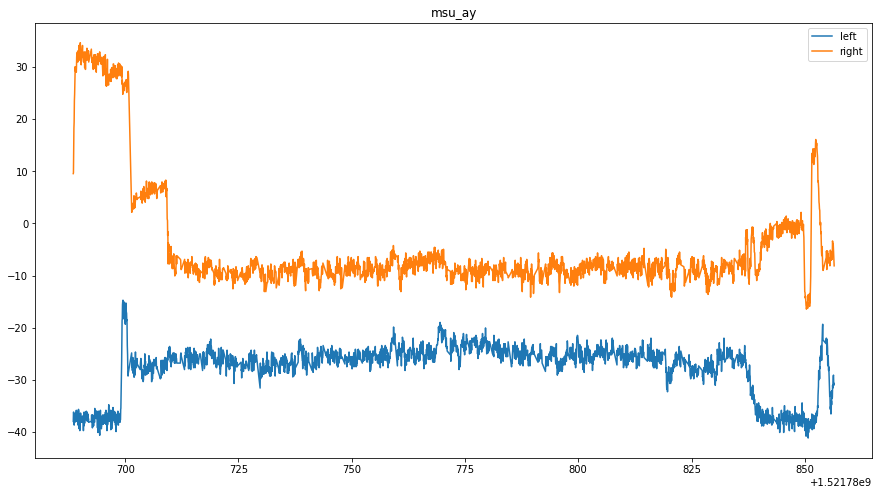

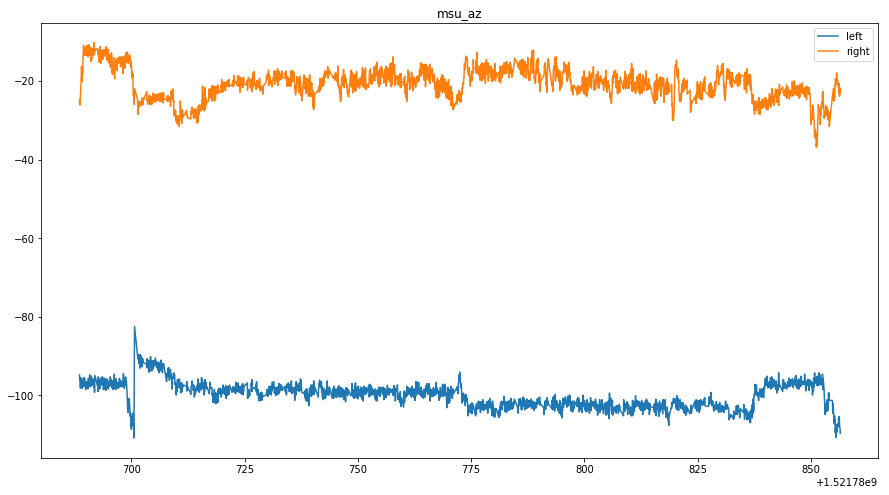

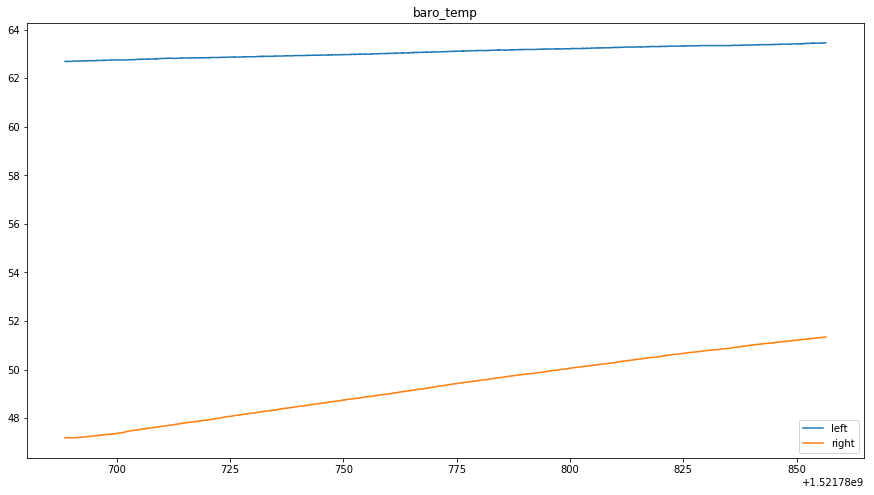

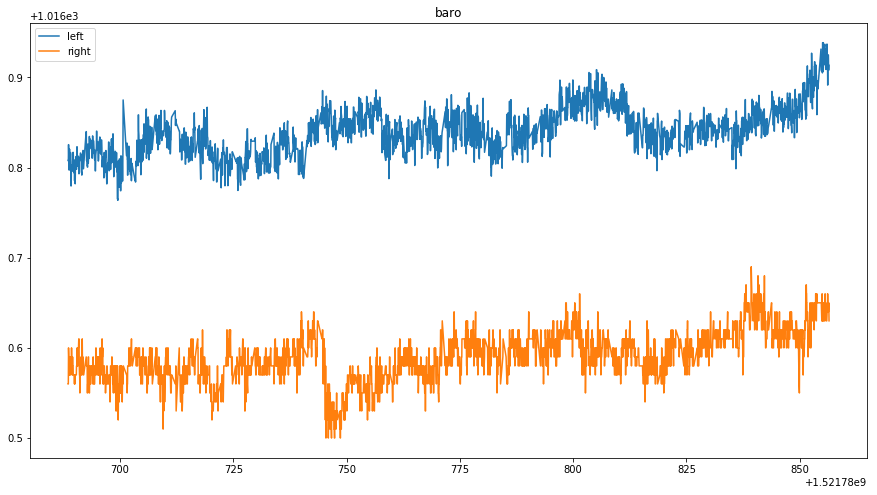

bb_capture_capture_2018_03_23_12_58_32.csv


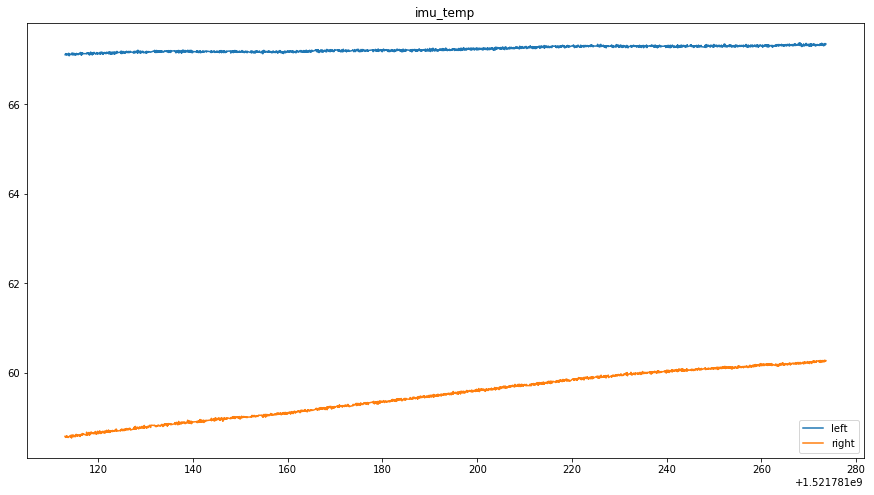

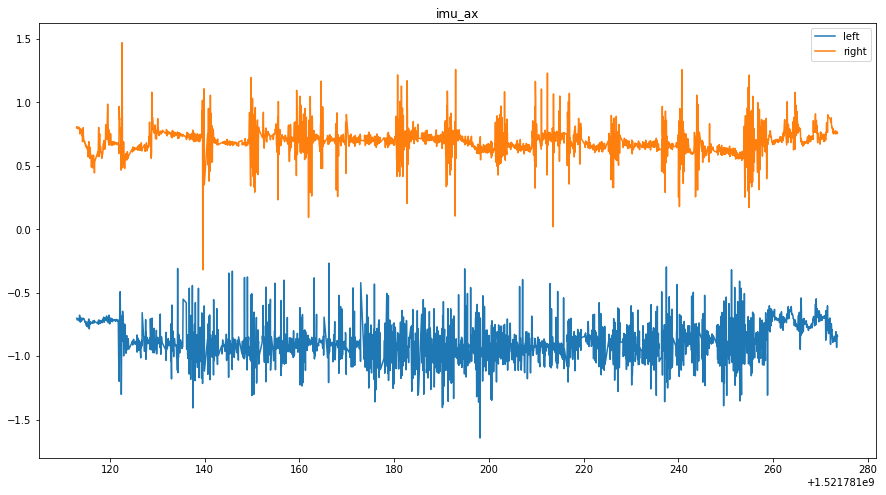

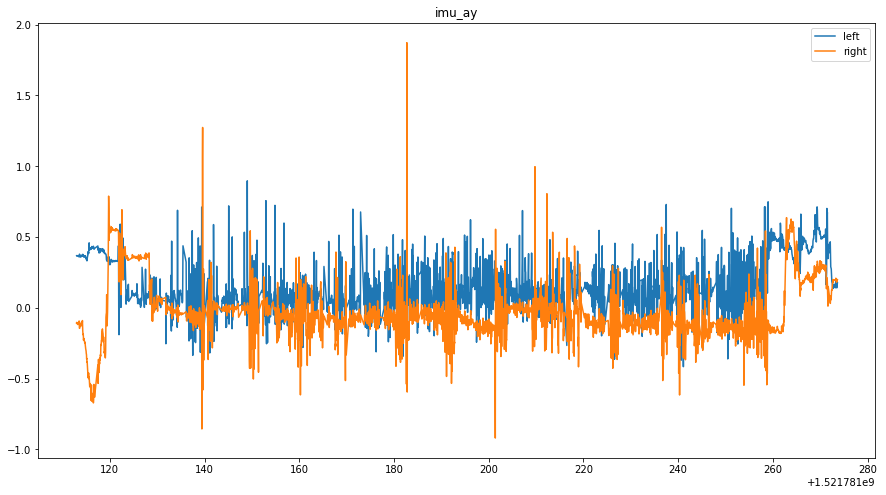

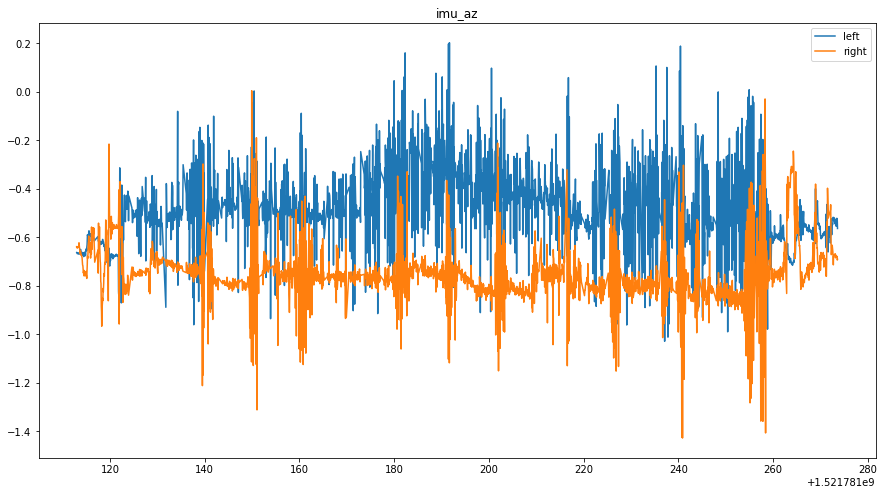

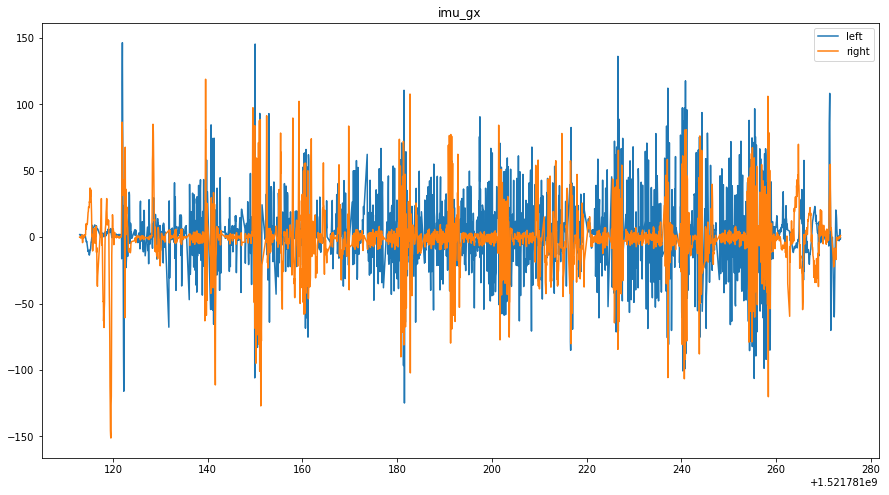

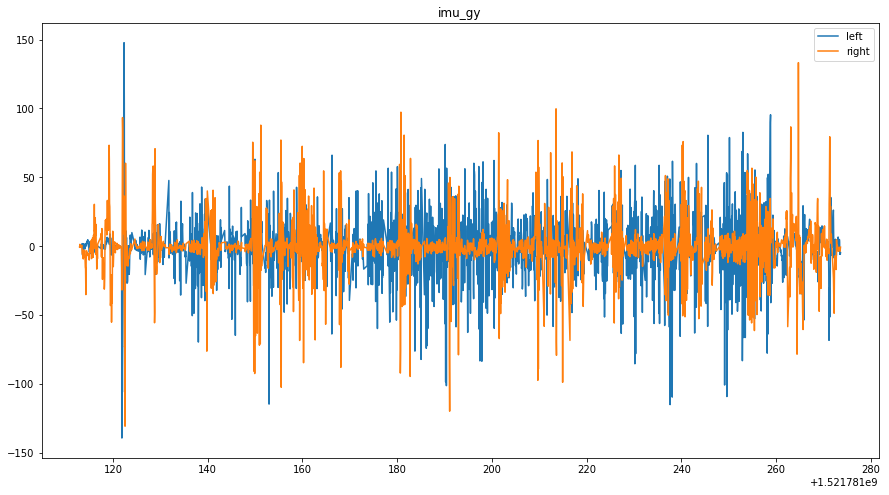

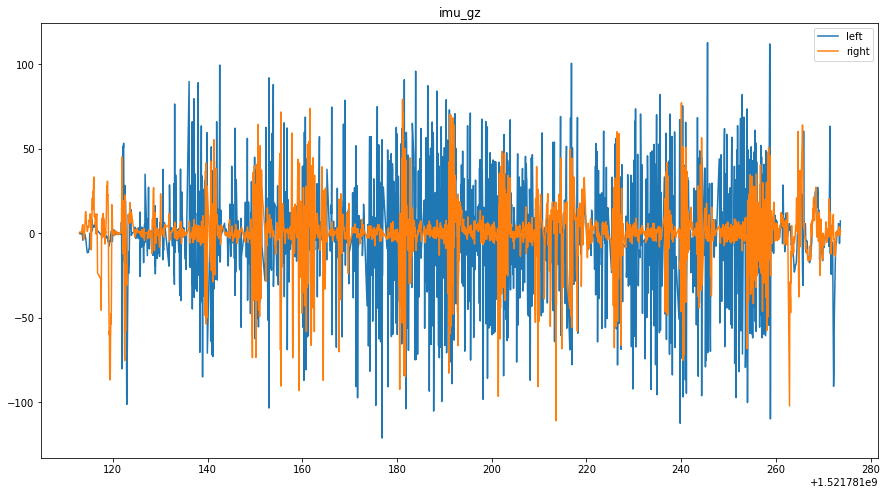

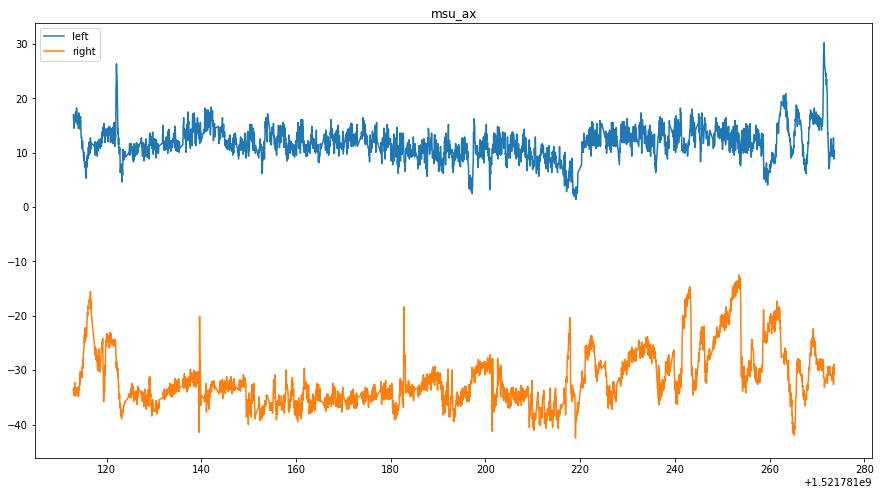

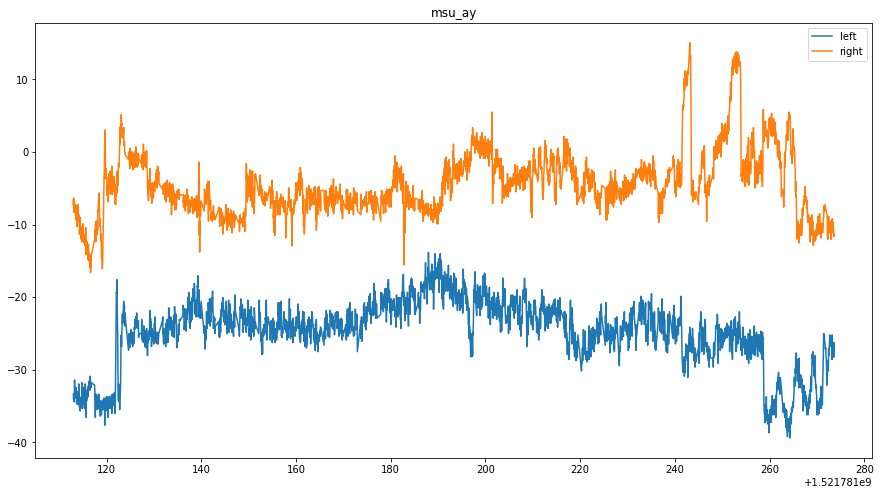

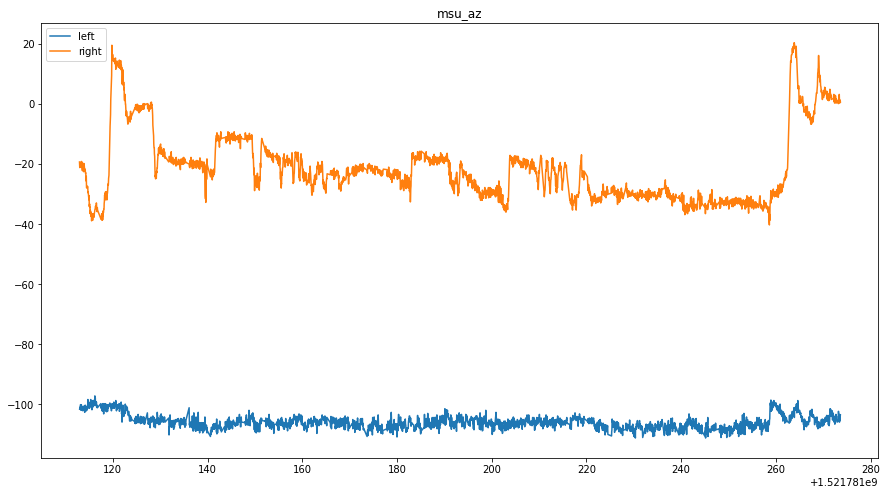

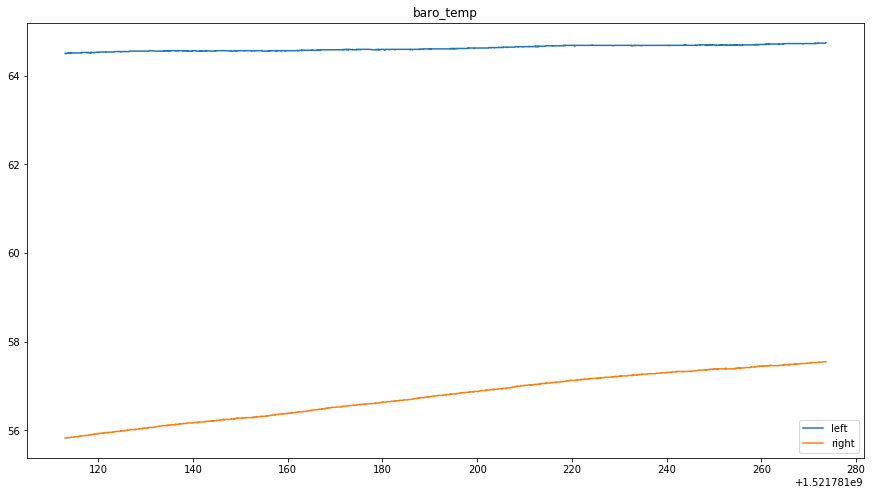

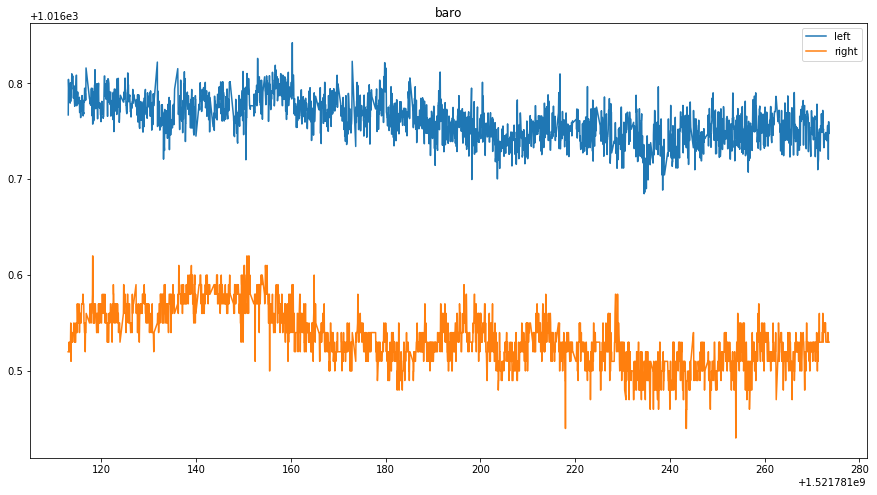

In [3]:
for i in range(len(bb_dfs)):
    left_df = left_bb_dfs[i]
    right_df = right_bb_dfs[i]
    print(filenames[i])
    for col in left_df:
        if col != 'timestamp' and col != 'wall_time':
            plt.figure(figsize=(15, 8))
            plt.plot(left_df['timestamp'], left_df[col], label='left')
            plt.plot(right_df['timestamp'], right_df[col], label='right')
            plt.legend()
            plt.title('%s' % (col))
            plt.show()